<font color = '#4682B4'>

## The Evolution of Portuguese Public Contracts Value across Time, Location and Service Type ##
</font>

#### Group C3:
João Bilé (20241345)
Carolina Carvalho (20241349)
Gabriel Domenech (20241354)
Md Haque (20241356)

# 📚 Table of Contents

1. **Analyses**

    1.1. **Finding out if all parts of the country have been affected the same way?**

    1.2. **How has public contracts value evolved over time when compared with inflation?**

    1.3. **Are there any areas (e.g. education, construction or health) that have seen bigger price increases over time?**

    1.4. **Are there companies getting more government contracts over time?**

    1.5. **Has the PRR had a big impact and, in which areas?**

    1.6. **Have COVID and the Ukraine war changed public contracts in Portugal?**

In [5]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import matplotlib.ticker as mticker
from datetime import datetime
sns.set(style="whitegrid")
import os
import re
from IPython.display import display

In [6]:
#Importing the dataframe

#Full path
base_path = 'Group_C3'
file_name = 'df_merged.csv'
full_path = os.path.join(os.path.dirname(base_path), file_name)

#Check and load
if os.path.exists(full_path):
    df_merged = pd.read_csv(full_path, encoding='utf-8', low_memory=False, index_col=0)
    print("df_merged loaded successfully")
else:
    print(f"File not found: {full_path}")

df_merged loaded successfully


In [7]:
df_merged

,contracted_entity,nif_contracted,contract_type,procedure_type,contracting_entity,publication_date,cpv,execution_location,initial_price,final_price,...,cpv_macro_desc,cd_projeto,is_prr,contract_type_1,contract_type_2,contract_type_3,year,contract_price_analysis,clean_contracted_entity,event_period
0,Great Ink,513179763,Aquisição de bens móveis,Consulta Prévia,Ministério da Defesa Nacional - Marinha,2019-10-10,39151100-6,"[{'country': 'Portugal', 'district': 'Setubal'...",5879.00,NaN,...,Equipamentos e artigos diversos,NaN,False,Aquisição de bens móveis,NaN,NaN,2019,5879.00,Great Ink,pre_covid
1,Bricantel Lda,502888539,Aquisição de bens móveis,Consulta Prévia,Município de Sintra,2018-10-25,44832200-3,"[{'country': 'Portugal', 'district': 'Lisboa',...",1000.00,NaN,...,Materiais de construção e acessórios,NaN,False,Aquisição de bens móveis,NaN,NaN,2018,1000.00,Bricantel Comércio de Material Electrico de Br...,pre_covid
2,Contenur Portugal S A,502137770,Aquisição de bens móveis,Consulta Prévia,Município de Ovar,2018-06-19,34928480-6,"[{'country': 'Portugal', 'district': 'Aveiro',...",7661.00,NaN,...,Equipamento de transporte,NaN,False,Aquisição de bens móveis,NaN,NaN,2018,7661.00,Contenur Portugal SA,pre_covid
3,Speedmedia Serviços Multimédia Lda,504929518,Aquisição de serviços,Ajuste Direto Regime Geral,Freguesia de Beato,2018-08-10,92340000-6,"[{'country': 'Portugal', 'district': 'Lisboa',...",12500.00,NaN,...,"Serviços recreativos, culturais e desportivos",NaN,False,Aquisição de serviços,NaN,NaN,2018,12500.00,Speedmedia Serviços Multimédia Lda,pre_covid
4,Transportes Silva Baptista Lda,501956174,Aquisição de serviços,Ajuste Direto Regime Geral,Município de Penacova,2018-10-04,92332000-7,"[{'country': 'Portugal', 'district': 'Coimbra'...",12780.00,12780.0,...,"Serviços recreativos, culturais e desportivos",NaN,False,Aquisição de serviços,NaN,NaN,2018,12780.00,Transportes Silva Baptista Lda,pre_covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182374,Peviquímica Lda Produtos de Limpeza e Manutenç...,503313262,['Aquisição de bens móveis'],Consulta Prévia,['600010791 - Escola Secundária Martins Sarmen...,2025-05-17,['39830000-9 - Produtos de limpeza'],"['Portugal, Braga, Guimarães']",4861.73,0.0,...,Equipamentos e artigos diversos,NaN,False,Aquisição de bens móveis,NaN,NaN,2025,3061.88,PEVIQUIMICA LDA,ukraine_war
1182375,VECOURBANDESIGN UNIPESSOAL LDA,505070022,['Empreitadas de obras públicas'],Ajuste Direto Regime Geral,['510841074 - União das Freguesias de Vila Gar...,2025-05-17,['45212130-6 - Construção de parque de diversõ...,"['Portugal, Porto, Amarante']",13617.72,0.0,...,Trabalhos de construção,NaN,False,Empreitadas de obras públicas,NaN,NaN,2025,12846.91,VecoUrbandesign Unipessoal Lda,ukraine_war
1182376,Claranet II Solutions SA,510728189,['Aquisição de bens móveis'],Concurso público,"['516726862 - Hospital de Loures, E. P. E.']",2025-05-17,['48200000-0 - Pacote de software para ligaçõe...,"['Portugal, Lisboa, Loures']",1029501.48,0.0,...,Software e sistemas de informação,NaN,False,Aquisição de bens móveis,NaN,NaN,2025,52944.35,CLARANET II SOLUTIONS S A,ukraine_war
1182377,Brigida & Dinis Sociedade de Construções Lda,503922480,['Empreitadas de obras públicas'],Consulta Prévia,['506922383 - Freguesia de Horta'],2025-05-17,['45233200-1 - Obras diversas de pavimentação'],"['Portugal, Guarda, Vila Nova de Foz Coa']",48276.00,0.0,...,Trabalhos de construção,NaN,False,Empreitadas de obras públicas,NaN,NaN,2025,48272.80,BRIGIDA & DINIS SOCIEDADE DE CONSTRUÇÕES LDA,ukraine_war


## Analyses

### Finding out if all parts of the country have been affected the same way?
- _First group by district_
- _Calculate total funding on each district_
- _Visualizing based on the district_

In [10]:
#Reset index and rename if necessary
df_merged = df_merged.reset_index()
df_merged.rename(columns={'index': 'contract_id'}, inplace=True)

#Extract district from execution_location
def get_district(loc_str):
    try:
        loc = ast.literal_eval(loc_str)
        if isinstance(loc, list) and loc:
            return loc[0].get("district")
    except:
        return None

df_merged['district'] = df_merged['execution_location'].apply(get_district)

#Ensure final_price is numeric
df_merged['final_price'] = pd.to_numeric(df_merged['final_price'], errors='coerce')

#Group by district
district_summary = df_merged.groupby('district', dropna=True).agg({
    'contract_id': 'count',
    'final_price': 'sum'
}).rename(columns={
    'contract_id': 'num_contracts',
    'final_price': 'total_value'
}).reset_index()

**Statistical analysis**
- CV < 0.1 → Low variation (fairly equal)

- CV 0.1 – 0.4 → Moderate variation

- CV > 0.4 → High variation (some districts heavily favored)

In [12]:
cv_value = np.std(district_summary['total_value']) / np.mean(district_summary['total_value'])
cv_contracts = np.std(district_summary['num_contracts']) / np.mean(district_summary['num_contracts'])

print(f"CV (Contract Value): {cv_value:.2f}")
print(f"CV (Contract Count): {cv_contracts:.2f}")

CV (Contract Value): 0.99
CV (Contract Count): 1.15


C:\Users\carol\AppData\Local\Temp\ipykernel_20164\141686510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_summary.sort_values('total_value', ascending=False),


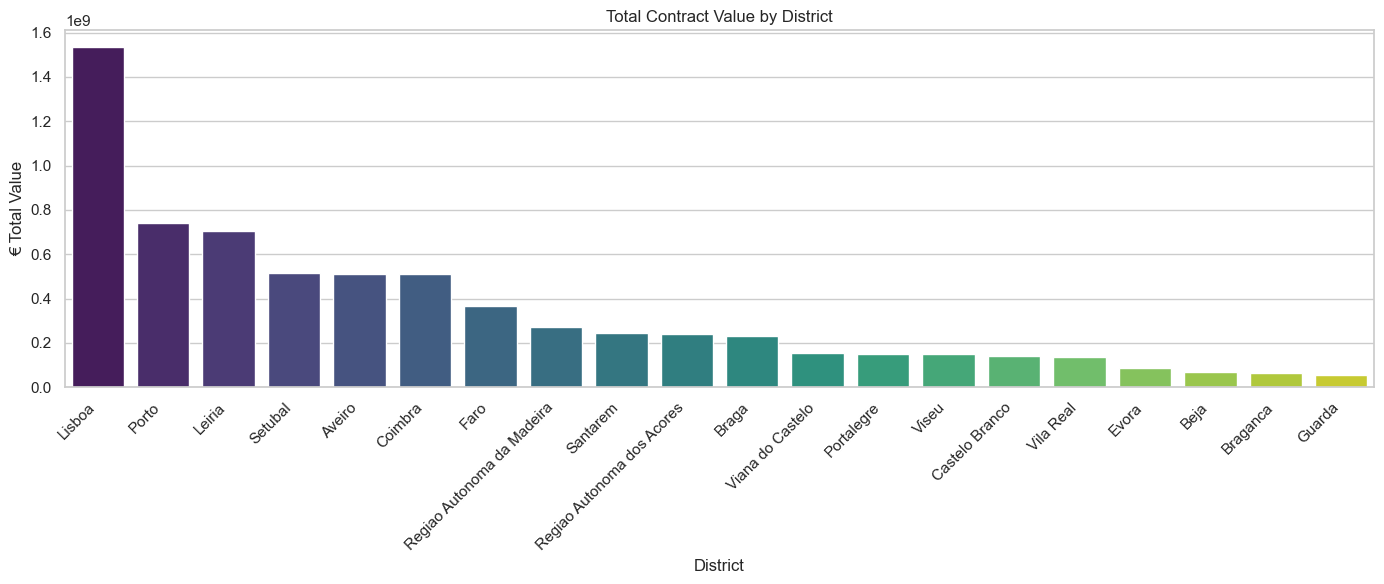

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(data=district_summary.sort_values('total_value', ascending=False),
            x='district', y='total_value', palette='viridis')

plt.title("Total Contract Value by District")
plt.ylabel("€ Total Value")
plt.xlabel("District")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### How has public contracts value evolved over time when compared with inflation?

Has the public contracts average value grown above inflation?

#### Calculate the growth rate on the average public contract value

In [15]:
#we calculated the average initial price grouping by year
#avg_initial_price_per_year = df_merged.groupby('contract_year')['initial_price'].mean().reset_index().round(0)

#print(avg_initial_price_per_year)

#we calculated the average final price grouping by year
#avg_final_price_per_year = df_merged.groupby('contract_year')['final_price'].mean().reset_index().round(0)

#print(avg_final_price_per_year)

#we calculated the average contract value grouping by year
#avg_contract_value_per_year = df_merged.groupby('contract_year')['contract_value'].mean().reset_index().round(0)

#print(avg_contract_value_per_year)

#we calculated the average contract value grouping by year
df_contract_price_per_year = df_merged.groupby('contract_year')['contract_price_analysis'].mean().reset_index().round(0)
df_contract_price_per_year['yoy_growth'] = (df_contract_price_per_year['contract_price_analysis'].pct_change()*100).round(2)

print(df_contract_price_per_year)

   contract_year  contract_price_analysis  yoy_growth
0           2018                  65036.0         NaN
1           2019                  66760.0        2.65
2           2020                  80053.0       19.91
3           2021                  78844.0       -1.51
4           2022                  78657.0       -0.24
5           2023                  92394.0       17.46
6           2024                  88756.0       -3.94
7           2025                 111390.0       25.50


#### Add additional data on inflation for Portugal (by Industry and Year)

In [17]:
#Get data for inflation

#Full path
base_path = 'Group_C3'
file_name = 'Inflation_data.csv'
full_path = os.path.join(os.path.dirname(base_path), file_name)

#Check and load
if os.path.exists(full_path):
    df_inflation = pd.read_csv(full_path, encoding='ISO-8859-1', low_memory=False)
    print("df_merged loaded successfully")
else:
    print(f"File not found: {full_path}")

df_inflation.tail()

df_merged loaded successfully


,Year,Industry,Type,Value
840,2024,Restaurantes e hotéis,YoY,4.79
841,2024,Saúde,YoY,3.59
842,2024,Total,YoY,2.42
843,2024,Transportes,YoY,1.34
844,2024,Vestuário e calçado,YoY,-1.22


In [18]:
#Join inflation data with the dataframe with average contract prices
df_contract_price_and_inflation = df_contract_price_per_year.merge(df_inflation[df_inflation['Industry'] == 'Total'][['Year', 'Value']],left_on='contract_year',right_on='Year',how='left').drop(columns='Year')
print(df_contract_price_and_inflation)

#Remove 2018 (no yoy growth) and 2025 (no inflation)
df_contract_price_and_inflation  = df_contract_price_and_inflation[~df_contract_price_per_year['contract_year'].isin([2018, 2025])]
print(df_contract_price_and_inflation)

   contract_year  contract_price_analysis  yoy_growth  Value
0           2018                  65036.0         NaN   0.99
1           2019                  66760.0        2.65   0.34
2           2020                  80053.0       19.91  -0.01
3           2021                  78844.0       -1.51   1.27
4           2022                  78657.0       -0.24   7.83
5           2023                  92394.0       17.46   4.31
6           2024                  88756.0       -3.94   2.42
7           2025                 111390.0       25.50    NaN
   contract_year  contract_price_analysis  yoy_growth  Value
1           2019                  66760.0        2.65   0.34
2           2020                  80053.0       19.91  -0.01
3           2021                  78844.0       -1.51   1.27
4           2022                  78657.0       -0.24   7.83
5           2023                  92394.0       17.46   4.31
6           2024                  88756.0       -3.94   2.42


#### Create a visualization for the growth of public contract prices comparing it to inflation

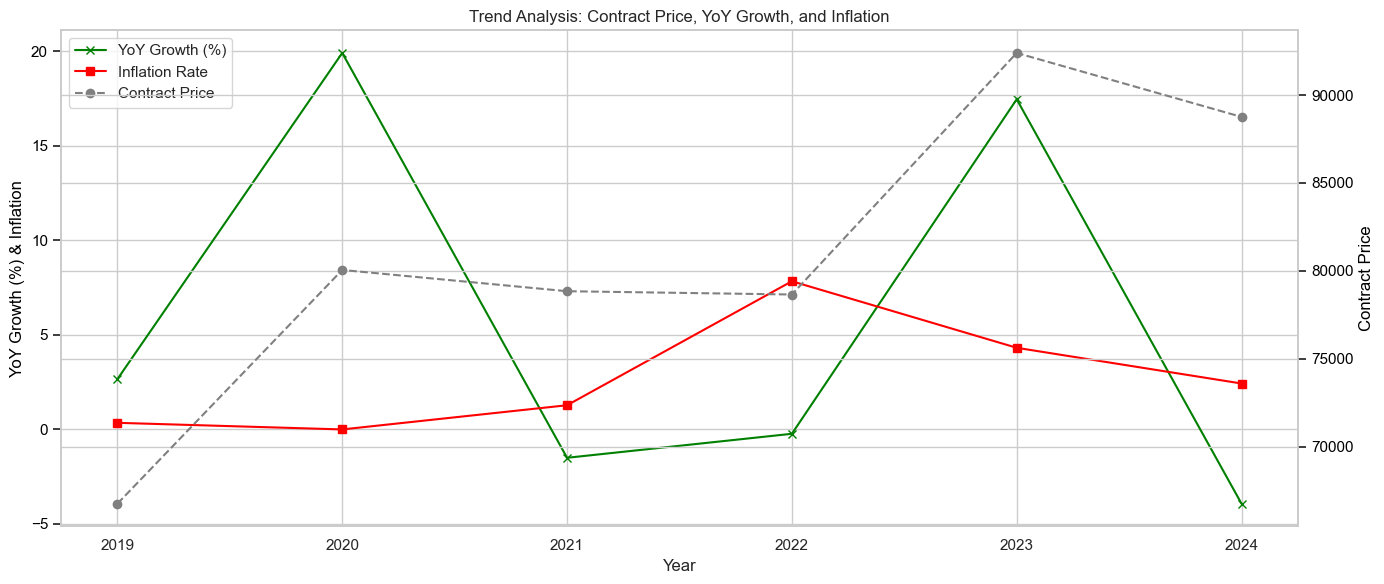

In [20]:
fig, ax1 = plt.subplots(figsize=(14, 6))

#Primary Axis
ax1.plot(df_contract_price_and_inflation['contract_year'], df_contract_price_and_inflation['yoy_growth'], color='green', marker='x', linestyle='-', label='YoY Growth (%)')
ax1.plot(df_contract_price_and_inflation['contract_year'], df_contract_price_and_inflation['Value'], color='red', marker='s', linestyle='-', label='Inflation Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('YoY Growth (%) & Inflation', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ymin, ymax = ax1.get_ylim()
#ax1.set_yticks(np.arange(np.floor(ymin), np.ceil(ymax) + 1, 1))

#Secondary Axis
ax2 = ax1.twinx()
ax2.plot(df_contract_price_and_inflation['contract_year'], df_contract_price_and_inflation['contract_price_analysis'], color='grey', marker='o', linestyle='--', label='Contract Price')
ax2.set_ylabel('Contract Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#Plot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Trend Analysis: Contract Price, YoY Growth, and Inflation')
plt.grid(True)
plt.tight_layout()
plt.show()

For 2019-2020 the YoY growth % of the average value of public contracts was above inflation
  - **2019:** 2.65% (YoY Growth %) vs 0.34% (Inflation)
  - **2020:** 19.91% (YoY Growth %) vs -0.01% (Inflation)

For the remaining period of 2021-2024, the value of inflation measured in Portugal was steadily above the YoY growth of the average value of portuguese public contracts

### Are there any areas (e.g. education, construction or health) that have seen bigger price increases over time?

#### Check the main types of contracts

In [23]:
#Count how many contract_type columns are filled (non-null) per row
df_merged['n_contract_types'] = df_merged[['contract_type_1', 'contract_type_2', 'contract_type_3']].notna().sum(axis=1)

#Count the number of contracts by how many types they have (1, 2 or 3)
contract_type_counts = df_merged['n_contract_types'].value_counts().sort_index()

print("Number of contracts by number of contract types:")
print(contract_type_counts)

Number of contracts by number of contract types:
n_contract_types
0          2
1    1178348
2       3973
3         56
Name: count, dtype: int64


In [24]:
#Understand what are the main contract types
top_contract_types = df_merged['contract_type'].value_counts().head(10)

top_contract_types

contract_type
Aquisição de bens móveis                                 381896
['Aquisição de bens móveis']                             258572
Aquisição de serviços                                    236743
['Aquisição de serviços']                                192118
Empreitadas de obras públicas                             55531
['Empreitadas de obras públicas']                         30697
Locação de bens móveis                                     7644
['Locação de bens móveis']                                 5649
['Aquisição de bens móveis', 'Aquisição de serviços']      3113
Aquisição de bens móveis<br/>Aquisição de serviços         3013
Name: count, dtype: int64

Around 50% of public contracts are classified as "Aquisição de bens móveis" (29%) or "Aquisição de serviços" (19%)

#### Prepare data on the evolution of avg. contract value for each contract type for visualization

In [26]:
#Rename the existing 'contract_type' column to avoid conflict
df_temp = df_merged.rename(columns={'contract_type': 'contract_type_original'}).copy()

#Stack all contract_type_1, 2, 3 into one column
stacked_types = df_temp.melt(
    id_vars=['contract_year', 'contract_price_analysis'],
    value_vars=['contract_type_1', 'contract_type_2', 'contract_type_3'],
    var_name='type_level',
    value_name='contract_type'
)

#Drop rows without contract_type
stacked_types = stacked_types.dropna(subset=['contract_type'])

#Aggregate by year and type
plot_contract_types = (
    stacked_types.groupby(['contract_year', 'contract_type'])['contract_price_analysis']
    .mean()
    .reset_index()
    .round(0)
)

#Add YoY growth
plot_contract_types['yoy_growth'] = (
    plot_contract_types.groupby('contract_type')['contract_price_analysis']
    .pct_change() * 100
).round(2)

#Keep only top types if desired
top_types = stacked_types['contract_type'].value_counts().head(2).index
plot_contract_types = plot_contract_types[plot_contract_types['contract_type'].isin(top_types)]

# Result
display(plot_contract_types)


,contract_year,contract_type,contract_price_analysis,yoy_growth
0,2018,Aquisição de bens móveis,42686.0,NaN
10,2018,Aquisição de serviços,57746.0,NaN
56,2019,Aquisição de bens móveis,42775.0,0.21
62,2019,Aquisição de serviços,57810.0,0.11
117,2020,Aquisição de bens móveis,46232.0,8.08
130,2020,Aquisição de serviços,70843.0,22.54
181,2021,Aquisição de bens móveis,42208.0,-8.70
195,2021,Aquisição de serviços,88299.0,24.64
246,2022,Aquisição de bens móveis,53416.0,26.55
255,2022,Aquisição de serviços,63675.0,-27.89


In [27]:
#Join inflation data with the dataframe with average contract prices
df_plot_contract_types_and_inflation = plot_contract_types.merge(df_inflation[df_inflation['Industry'] == 'Total'][['Year', 'Value']],left_on='contract_year',right_on='Year',how='left').drop(columns='Year')
#print(df_plot_contract_types_and_inflation)

#Remove 2018 (no yoy growth) and 2025 (no inflation)
df_plot_contract_types_and_inflation = df_plot_contract_types_and_inflation[~df_plot_contract_types_and_inflation['contract_year'].isin([2018, 2025])]
print(df_plot_contract_types_and_inflation)

    contract_year             contract_type  contract_price_analysis  \
2            2019  Aquisição de bens móveis                  42775.0   
3            2019     Aquisição de serviços                  57810.0   
4            2020  Aquisição de bens móveis                  46232.0   
5            2020     Aquisição de serviços                  70843.0   
6            2021  Aquisição de bens móveis                  42208.0   
7            2021     Aquisição de serviços                  88299.0   
8            2022  Aquisição de bens móveis                  53416.0   
9            2022     Aquisição de serviços                  63675.0   
10           2023  Aquisição de bens móveis                  64062.0   
11           2023     Aquisição de serviços                  68244.0   
12           2024  Aquisição de bens móveis                  58443.0   
13           2024     Aquisição de serviços                  72204.0   

    yoy_growth  Value  
2         0.21   0.34  
3         0.11 

#### Visualizing the evolution of contract types avg. value when compared to inflation

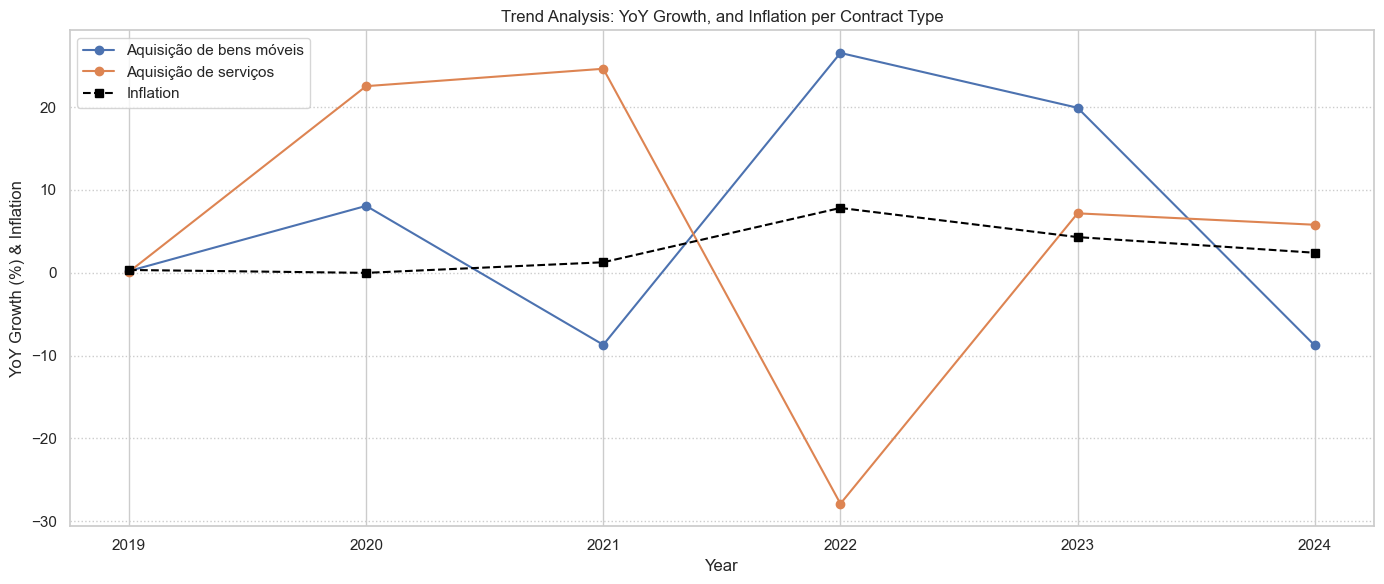

In [29]:
#Prepare the YoY growth per contract type per year
pivot_prices = (df_plot_contract_types_and_inflation.pivot(index="contract_year", columns="contract_type", values="yoy_growth"))

#Prepare the inflation values per year
inflation = (df_plot_contract_types_and_inflation.groupby("contract_year")["Value"].first())

#Visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

#YoY growth per contract type per year
for col in pivot_prices.columns:
    ax1.plot(pivot_prices.index, pivot_prices[col], marker="o", label=col)

ax1.set_xlabel("Year")
ax1.set_ylabel("YoY Growth (%) & Inflation")
ax1.grid(True, axis="y", linestyle=":")

#Inflation values per year
ax1.plot(inflation.index, inflation.values, linestyle="--", marker="s", label="Inflation", color="black")

# Combine information
lines = ax1.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

ax1.set_title("Trend Analysis: YoY Growth, and Inflation per Contract Type")
plt.tight_layout()
plt.show()

- Aquisição de bens móveis: The YoY growth for this category was above inflation for 3 out of the 5 years in analysis (2020, 2022, and 2023), having reached a peak % growth of 26.6% in 2022. For the remaining years (2019, 2021 and 2024) the evolution on the avg. contract value was either in line or below inflation

- Aquisição de serviços: This category showed a peak in YoY contract value growth for 2020 (+22.5%) and 2021(+24.7%), followed by a drop on average contract value in 2022 (-27.9%)

#### Check the main types of CPV's

In [31]:
# Understand what are the main cpv descriptions
top_cpvs = df_merged['cpv_macro_desc'].value_counts().head(10)

top_cpvs

cpv_macro_desc
Equipamento de imagiologia médica, precisão e ótica       377650
Trabalhos de construção                                    86156
Serviços educacionais e formação                           71800
Serviços de reparação e manutenção                         60874
Serviços de arquitetura e engenharia                       50856
Serviços de TI, consultoria e desenvolvimento              45570
Serviços recreativos, culturais e desportivos              38335
Produtos alimentares, bebidas, tabaco e produtos afins     37750
Máquinas, equipamentos, ferramentas e instalações          37002
Equipamentos e artigos diversos                            31259
Name: count, dtype: int64

"Produtos farmacêuticos" (5%) and "Equipamento médico" (5%) are two of the most common cvp types in portuguese public contracts.

#### Prepare data on the evolution of avg. contract value for each CPV type for visualization

In [33]:
# Save the main cvp types for plot chart
filtered_cpv = df_merged[~df_merged['cpv_macro_desc'].eq('Serviços de reparação e manutenção')] # we remove 'Serviços de reparação e manutenção' from this part of the analysis due to its outlier growth in 2023
filter = filtered_cpv['cpv_macro_desc'].value_counts().head(5).index
filtered_df_merged = df_merged[df_merged['cpv_macro_desc'].isin(filter)]

plot_cpv_types= filtered_df_merged.groupby(['contract_year', 'cpv_macro_desc'])['contract_price_analysis'].mean().reset_index().round(0)
plot_cpv_types['yoy_growth'] = (plot_cpv_types.groupby('cpv_macro_desc')['contract_price_analysis'].pct_change()*100).round(2)

plot_cpv_types

,contract_year,cpv_macro_desc,contract_price_analysis,yoy_growth
0,2018,"Equipamento de imagiologia médica, precisão e ...",35221.0,NaN
1,2018,"Serviços de TI, consultoria e desenvolvimento",58591.0,NaN
2,2018,Serviços de arquitetura e engenharia,39782.0,NaN
3,2018,Serviços educacionais e formação,43912.0,NaN
4,2018,Trabalhos de construção,225137.0,NaN
5,2019,"Equipamento de imagiologia médica, precisão e ...",40816.0,15.89
6,2019,"Serviços de TI, consultoria e desenvolvimento",63766.0,8.83
7,2019,Serviços de arquitetura e engenharia,40772.0,2.49
8,2019,Serviços educacionais e formação,48125.0,9.59
9,2019,Trabalhos de construção,247009.0,9.71


In [34]:
#Join inflation data with the dataframe with average contract prices
df_plot_cpv_types_and_inflation = plot_cpv_types.merge(df_inflation[df_inflation['Industry'] == 'Total'][['Year', 'Value']],left_on='contract_year',right_on='Year',how='left').drop(columns='Year')
#print(df_plot_cvp_types_and_inflation)

#Remove 2018 (no yoy growth) and 2025 (no inflation)
df_plot_cpv_types_and_inflation = df_plot_cpv_types_and_inflation[~df_plot_cpv_types_and_inflation['contract_year'].isin([2018, 2025])]
print(df_plot_cpv_types_and_inflation)

    contract_year                                     cpv_macro_desc  \
5            2019  Equipamento de imagiologia médica, precisão e ...   
6            2019      Serviços de TI, consultoria e desenvolvimento   
7            2019               Serviços de arquitetura e engenharia   
8            2019                   Serviços educacionais e formação   
9            2019                            Trabalhos de construção   
10           2020  Equipamento de imagiologia médica, precisão e ...   
11           2020      Serviços de TI, consultoria e desenvolvimento   
12           2020               Serviços de arquitetura e engenharia   
13           2020                   Serviços educacionais e formação   
14           2020                            Trabalhos de construção   
15           2021  Equipamento de imagiologia médica, precisão e ...   
16           2021      Serviços de TI, consultoria e desenvolvimento   
17           2021               Serviços de arquitetura e engenh

#### Visualizing the evolution of CPV types avg. value when compared to inflation

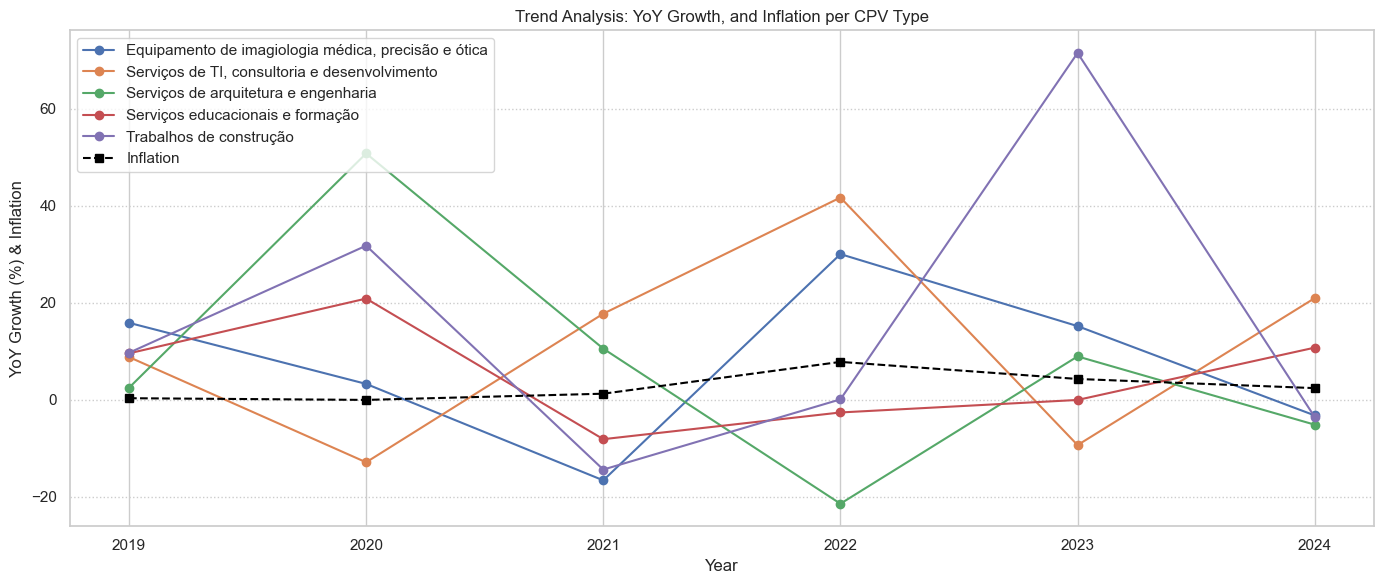

In [36]:
#Prepare the YoY growth per CPV type per year
pivot_prices = (df_plot_cpv_types_and_inflation.pivot(index="contract_year", columns="cpv_macro_desc", values="yoy_growth"))

#Prepare the inflation values per year
inflation = (df_plot_cpv_types_and_inflation.groupby("contract_year")["Value"].first())

#Visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

#YoY growth per CPV type per year
for col in pivot_prices.columns:
    ax1.plot(pivot_prices.index, pivot_prices[col], marker="o", label=col)

ax1.set_xlabel("Year")
ax1.set_ylabel("YoY Growth (%) & Inflation")
ax1.grid(True, axis="y", linestyle=":")

#Inflation values per year
ax1.plot(inflation.index, inflation.values, linestyle="--", marker="s", label="Inflation", color="black")

#Combine information
lines = ax1.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

ax1.set_title("Trend Analysis: YoY Growth, and Inflation per CPV Type")
plt.tight_layout()
plt.show()

### Are there companies getting more government contracts over time?

In [38]:
df_merged['nif_contracted'].isnull().sum()

40502

Contemplating that the name of the entities may be written in different forms, the contracted_entity will be standardize by the nif_contracted. Which means, group by nif_contracted and find the form that its more utilized and attibute that as the entity name.


In [40]:
#Make sure contracted_entity is a string (safe to convert)
df_merged['contracted_entity'] = df_merged['contracted_entity'].astype(str)

#Leave nif_contracted as missing values)
df_merged['nif_contracted'] = df_merged['nif_contracted'].replace('nan', pd.NA)

#Build the name mapping using only valid nifs
name_mapping = (
    df_merged[df_merged['nif_contracted'].notna()]  # Keep only rows with real NIFs
    .groupby(['nif_contracted', 'contracted_entity'])  # Group by NIF and name
    .size()  # Count how many times each (NIF, name) combo appears
    .reset_index(name='count')  # Turn into DataFrame
    .sort_values(['nif_contracted', 'count'], ascending=[True, False])  # Sort to get most common
    .drop_duplicates('nif_contracted')  # Keep only top name per NIF
    .set_index('nif_contracted')['contracted_entity']  # Convert to dictionary
    .to_dict()
)

#Create new clean_contracted_entity using the mapping
df_merged['clean_contracted_entity'] = df_merged.apply(
    lambda row: name_mapping.get(row['nif_contracted'], row['contracted_entity'])
    if pd.notna(row['nif_contracted'])
    else row['contracted_entity'],
    axis=1
)

print(df_merged[['contracted_entity', 'nif_contracted', 'clean_contracted_entity']].head(10))

                       contracted_entity nif_contracted  \
0                              Great Ink      513179763   
1                          Bricantel Lda      502888539   
2                  Contenur Portugal S A      502137770   
3     Speedmedia Serviços Multimédia Lda      504929518   
4         Transportes Silva Baptista Lda      501956174   
5        LABESFAL Laboratório Almiro S A      501169580   
6                  HTA HELICOPETEROS LDA      503811874   
7                    Mendes & Irmãos S A      500384436   
8  MADIGUIMA COMÉRCIO DE FRUTAS LIMITADA      503301205   
9               IBERDATA Equipamentos SA      501904921   

                             clean_contracted_entity  
0                                          Great Ink  
1  Bricantel Comércio de Material Electrico de Br...  
2                               Contenur Portugal SA  
3                 Speedmedia Serviços Multimédia Lda  
4                     Transportes Silva Baptista Lda  
5                   

In [41]:
df_merged[df_merged['nif_contracted'].isnull()].head(20)

,contract_id,contracted_entity,nif_contracted,contract_type,procedure_type,contracting_entity,publication_date,cpv,execution_location,initial_price,...,is_prr,contract_type_1,contract_type_2,contract_type_3,year,contract_price_analysis,clean_contracted_entity,event_period,district,n_contract_types
368715,368715,Shanghai EBO Optoelectronic Technology CO Ltd,NaN,Aquisição de bens móveis,Ajuste Direto Regime Geral,"LIP, Laboratório de Instrumentação e Física Ex...",2021-01-26,38000000-5,"[{'country': 'Portugal', 'district': 'Coimbra'...",24058.88,...,False,Aquisição de bens móveis,NaN,NaN,2021,24058.88,Shanghai EBO Optoelectronic Technology CO Ltd,covid,Coimbra,1
690731,690731,José Teixeira Moreira,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['510840744 - União das Freguesias de Unhão e ...,2023-01-02,['90611000-3 - Serviços de limpeza de ruas'],"['Portugal, Porto, Felgueiras']",9120.00,...,False,Aquisição de serviços,NaN,NaN,2023,9120.00,José Teixeira Moreira,ukraine_war,None,1
690732,690732,Maria Alice Martins Dias,NaN,['Aquisição de serviços'],Consulta Prévia,['510838626 - União das Freguesias de Pedreira...,2023-01-02,['90600000-3 - Serviços de saneamento e limpez...,"['Portugal, Porto, Felgueiras']",7704.00,...,False,Aquisição de serviços,NaN,NaN,2023,7704.00,Maria Alice Martins Dias,ukraine_war,None,1
690734,690734,Carina da Conceição Marques Rodrigues Loureiro,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['507853024 - Freguesia de Candoso (São Martin...,2023-01-02,['85322000-2 - Programa de acção comunitária'],"['Portugal, Braga, Guimarães']",11400.00,...,False,Aquisição de serviços,NaN,NaN,2023,11400.00,Carina da Conceição Marques Rodrigues Loureiro,ukraine_war,None,1
690737,690737,Joana Filipa Ferreira dos Santos,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['507853024 - Freguesia de Candoso (São Martin...,2023-01-02,['75110000-0 - Serviços públicos gerais'],"['Portugal, Braga, Guimarães']",9600.00,...,False,Aquisição de serviços,NaN,NaN,2023,9600.00,Joana Filipa Ferreira dos Santos,ukraine_war,None,1
690742,690742,João Fernandes da Silva Vieira,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['510836160 - União das Freguesias de Conde e ...,2023-01-02,['77311000-3 - Serviços de manutenção de jardi...,"['Portugal, Braga, Guimarães']",7200.00,...,False,Aquisição de serviços,NaN,NaN,2023,7200.00,João Fernandes da Silva Vieira,ukraine_war,None,1
690744,690744,Telma Cláudia Lourenço Macedo,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['510837565 - União das Freguesias de Loivos d...,2023-01-02,['75110000-0 - Serviços públicos gerais'],"['Portugal, Porto, Baião']",9600.00,...,False,Aquisição de serviços,NaN,NaN,2023,9600.00,Telma Cláudia Lourenço Macedo,ukraine_war,None,1
690745,690745,Manuel Fernando da Conceição Pinto Azevedo,NaN,['Aquisição de serviços'],Consulta Prévia,['510837565 - União das Freguesias de Loivos d...,2023-01-02,['90600000-3 - Serviços de saneamento e limpez...,"['Portugal, Porto, Baião']",9120.00,...,False,Aquisição de serviços,NaN,NaN,2023,9120.00,Manuel Fernando da Conceição Pinto Azevedo,ukraine_war,None,1
690747,690747,António Fernando Dias de Brito,NaN,['Aquisição de serviços'],Ajuste Direto Regime Geral,['507105141 - Freguesia de Carvalhosa'],2023-01-02,['90611000-3 - Serviços de limpeza de ruas'],"['Portugal, Porto, Paços de Ferreira']",10800.00,...,False,Aquisição de serviços,NaN,NaN,2023,10800.00,António Fernando Dias de Brito,ukraine_war,None,1
690751,690751,Fernando Vieira Pacheco,NaN,['Aquisição de serviços'],Consulta Prévia,['507105141 - Freguesia de Carvalhosa'],2023-01-02,['90611000-3 - Serviços de limpeza de ruas'],"['Portugal, Porto, Paços de Ferreira']",10800.00,...,False,Aquisição de serviços,NaN,NaN,2023,10800.00,Fernando Vieira Pacheco,ukraine_war,None,1


We have several missing NIF values, most of which are associated with individuals and the NIF could not be found. The other missing NIFs that are associated with entities do not affect the growth result of the analysis.

In [43]:
df_merged[df_merged['nif_contracted'].isna()]['contracted_entity'].value_counts()

contracted_entity
nan                               568
Miguel Luís Teixeira Guedes       215
BE CLINIGEN IRELAND LIMITED        74
Avelino da Silva Dores             48
Acrilicos Alvaro Lemos             39
                                 ... 
João Carlos Parreira Gaspar         1
Bruna Raquel dos Santos Semedo      1
José Carlos Azevedo Magalhães       1
Pedro Leitão Somalfer               1
Antonio dos Santos Tavares          1
Name: count, Length: 25860, dtype: int64

In [132]:
#Filter rows with missing nif
missing_nif_df = df_merged[df_merged['nif_contracted'].isna()]

#Count how many times each contracted_entity appears
entity_counts = missing_nif_df['contracted_entity'].value_counts()

#Filtering
more_than_two = entity_counts[entity_counts > 2]
one_contract = entity_counts[entity_counts <=  1]

#Results
num_entities_with_multiple_contracts = len(more_than_two)
num_entities_with_one = len(one_contract)

print("Number of contracted entities with missing NIFs and more than 2 contract:", num_entities_with_multiple_contracts)
print("Number of contracted entities with missing NIFs and less than 1 contract:", num_entities_with_one)

Number of contracted entities with missing NIFs and more than 2 contract: 2719
Number of contracted entities with missing NIFs and less than 1 contract: 17058


After cleaning and searching for more data on the missing nifs, we decided to see how this would affect the results of the growth. Of the 25860 entities with missing nif 17058 have only 1 contract, and 2719 have more than 2 contracts, since the top one with more contracts is Miguel Luís Teixeira Guedes with 215 contracts, not affecting the top entities. The entity with more contracts is B Braun Medical LDA with 10870 contracts. 

In [44]:
#Top 20 entities by number of contracts

top_entities_by_name = (
    df_merged
    .groupby(['nif_contracted', 'clean_contracted_entity'])
    .size()
    .reset_index(name='num_contracts')
    .sort_values('num_contracts', ascending=False)
    .head(20)
)

print(top_entities_by_name)

      nif_contracted                          clean_contracted_entity  \
6347       501506543                              B BRAUN MEDICAL LDA   
29320      508107997                         GENERIS FARMACEUTICA S A   
16977      504223933                           MEDTRONIC PORTUGAL LDA   
4981       501169580                           LABESFAL LAB ALMIRO SA   
17260      504293753               FRESENIUS KABI PHARMA PORTUGAL LDA   
21915      505792362  Overpharma Produtos Médicos e Farmacêuticos Lda   
18256      504615947    MEO Serviços de Comunicações e Multimédia S A   
1988       500162166                                   LAB PFIZER LDA   
1568       500063524             NOVARTIS FARMA PROD FARMACÊUTICOS SA   
1947       500153370                            JOHNSON & JOHNSON LDA   
13437      503347345                       BAXTER MEDICO FARMACEUTICA   
2276       500233810                   ROCHE FARMACÊUTICA QUIMICA LDA   
25685      507045491           TEVA PHARMA PRODUTOS

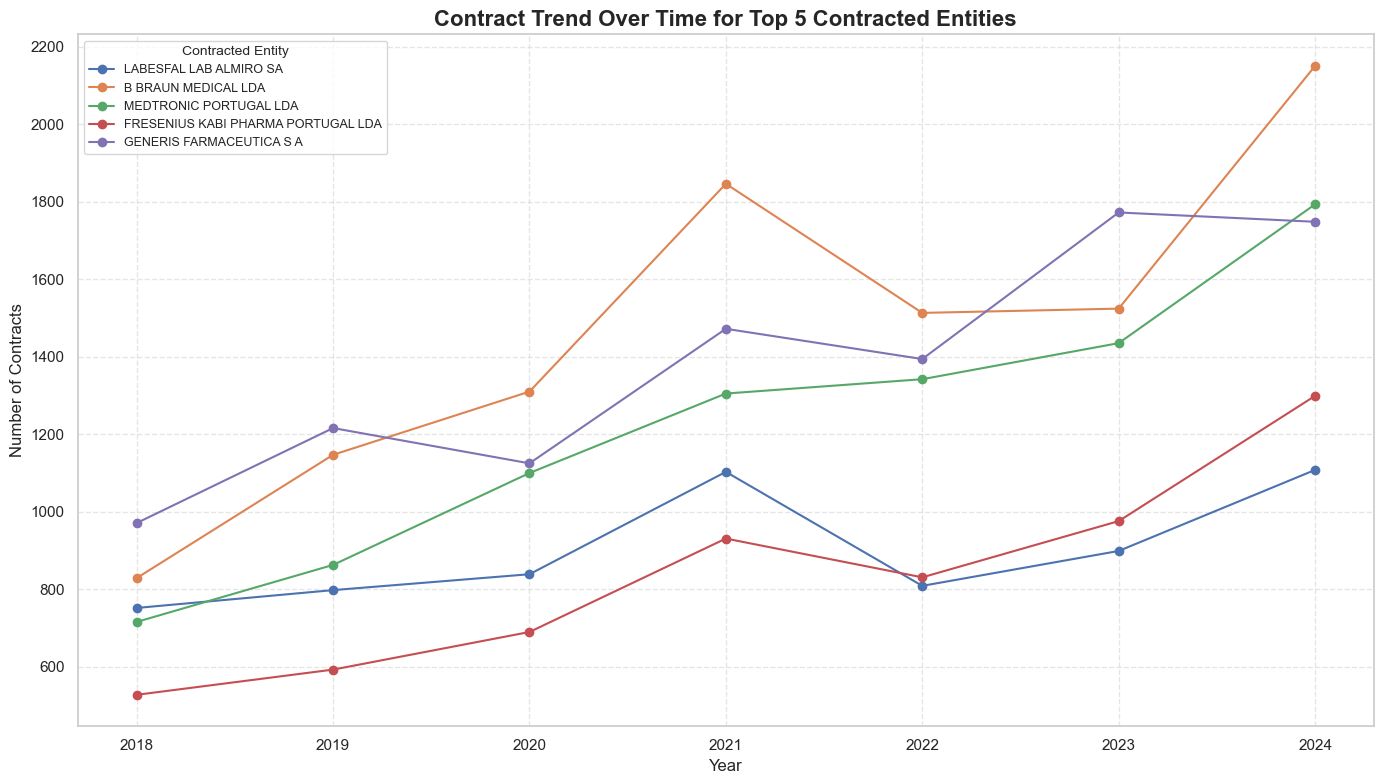

<Figure size 640x480 with 0 Axes>

In [45]:
#Remove null nifs
top_nif_entities_filtered = top_entities_by_name[
    top_entities_by_name['nif_contracted'].notna() &
    (~top_entities_by_name['nif_contracted'].isin(['nan', 'None']))
]

#Get top 10 nifs by contract volume
top_5_nifs = top_nif_entities_filtered['nif_contracted'].head(5).tolist()

#Filter main dataframe
df_top_nifs = df_merged[df_merged['nif_contracted'].isin(top_5_nifs)]

#Count contracts per year per nif
nif_yearly_trend = (
    df_top_nifs
    .groupby(['contract_year', 'nif_contracted'])
    .size()
    .reset_index(name='num_contracts')
)

#Pivot table for plotting
nif_trend_pivot = nif_yearly_trend.pivot(
    index='contract_year',
    columns='nif_contracted',
    values='num_contracts'
).fillna(0)

#Remove year 2025
nif_trend_pivot = nif_trend_pivot[nif_trend_pivot.index < 2025]

#Create nif-to-Entity Name mapping
nif_to_name = (
    df_top_nifs[['nif_contracted', 'clean_contracted_entity']]
    .drop_duplicates('nif_contracted')  # Keep first appearance only
    .set_index('nif_contracted')['clean_contracted_entity']
    .to_dict()
)

#Plot
plt.figure(figsize=(14, 8))

for nif in sorted(nif_trend_pivot.columns):
    label = nif_to_name.get(nif, nif)
    plt.plot(
        nif_trend_pivot.index,
        nif_trend_pivot[nif],
        marker='o',
        label=label
    )

plt.title('Contract Trend Over Time for Top 5 Contracted Entities', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Contracts', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(sorted(nif_trend_pivot.index))


plt.legend(
    title='Contracted Entity',
    loc='upper left',
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    fancybox=True
)

plt.tight_layout()
plt.show()
plt.savefig("contract_trends_absolute.png", dpi=300, bbox_inches='tight')

The entities with more contracts overall are:

1. B Braun Medical LDA
2. Generis Farmaceutica LDA
3. Medtronic Portugal LDA
4. Fresenius Kabi Pharma Portugal LDA
5. Labesfal Lab Almiro SA


In [47]:
#Count number of contracts per entity per year
yearly_counts = (
    df_merged
    .groupby(['contract_year', 'nif_contracted', 'clean_contracted_entity'])
    .size()
    .reset_index(name='num_contracts')
)

#Get total contracts in 2018 (baseline)
baseline_2018 = (
    yearly_counts[yearly_counts['contract_year'] == 2018]
    .copy()
)

#Get the top 5 entities based on number of contracts in 2018
top5_entities_2018 = (
    baseline_2018
    .sort_values('num_contracts', ascending=False)
    .head(5)
    [['nif_contracted', 'clean_contracted_entity']]
)

#Filter the full dataset to include only these top 5 entities
filtered_yearly = yearly_counts.merge(top5_entities_2018, on=['nif_contracted', 'clean_contracted_entity'])

#Pivot to calculate contract count per year per entity
pivot_table = filtered_yearly.pivot_table(
    index=['clean_contracted_entity'],
    columns='contract_year',
    values='num_contracts',
    fill_value=0
)

#Calculate percent growth vs 2018
pivot_table_growth = pivot_table.copy()
for year in pivot_table.columns:
    if year != 2018:
        pivot_table_growth[year] = ((pivot_table[year] - pivot_table[2018]) / pivot_table[2018]) * 100

pivot_table_growth = pivot_table_growth.drop(columns=2018)  # Optional: drop 2018 from growth table

#Reset index for visualization
pivot_table_growth = pivot_table_growth.reset_index()

#Melt to long format for plotting or display
growth_long = pivot_table_growth.melt(
    id_vars='clean_contracted_entity',
    var_name='contract_year',
    value_name='percent_growth_vs_2018'
)



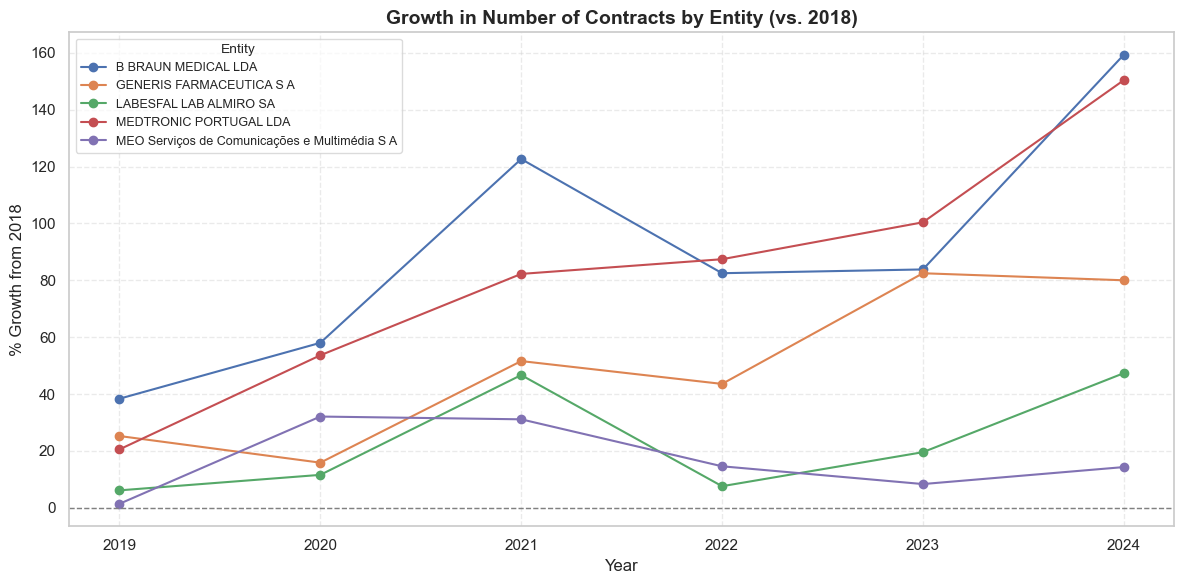

<Figure size 640x480 with 0 Axes>

In [48]:
#Remove 2025 from the data
filtered_growth = growth_long[growth_long['contract_year'] < 2025]

plt.figure(figsize=(12, 6))

#Plot each entity with a marker
for entity in sorted(filtered_growth['clean_contracted_entity'].unique()):
    entity_data = filtered_growth[filtered_growth['clean_contracted_entity'] == entity]
    plt.plot(
        entity_data['contract_year'],
        entity_data['percent_growth_vs_2018'],
        marker='o',
        label=entity
    )

#Add baseline
plt.axhline(0, color='gray', linestyle='--', linewidth=1)


plt.title('Growth in Number of Contracts by Entity (vs. 2018)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('% Growth from 2018', fontsize=12)
plt.xticks(sorted(filtered_growth['contract_year'].unique()))
plt.grid(True, linestyle='--', alpha=0.4)


plt.legend(
    title='Entity',
    loc='upper left',
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    fancybox=True,
    framealpha=0.7
)

plt.tight_layout()
plt.show()
plt.savefig("contract_growth_vs_2018.png", dpi=300, bbox_inches='tight')

The entities with greater overall growth are:

1. B Braun Medical LDA
2. Medtronic Portugal LDA
3. Generis Farmaceutica LDA
4. Labesfal Lab Almiro SA
5. MEO

Overall growth follows a similar trend to the number of contracts. The entities are related to the health sector, except for MEO that is in the telecomunications sector.


### Has the PRR had a big impact and, in which areas?

In [51]:
#How many contracts are part of the PRR by year

#Group by year and PRR status
grouped = df_merged.groupby(['contract_year', 'is_prr']).size()

#Convert the result to a table (with separate columns for True and False)
contract_counts = grouped.unstack(fill_value=0)

#Add a column with the total number of contracts in each year
contract_counts['total'] = contract_counts[True] + contract_counts[False]

#Calculate the percentage of PRR (True) contracts
contract_counts['prr_percent'] = (contract_counts[True] / contract_counts['total']) * 100

#Show the final table
print(contract_counts)

is_prr          False  True   total  prr_percent
contract_year                                   
2018           113838     0  113838     0.000000
2019           130873     0  130873     0.000000
2020           136044    26  136070     0.019108
2021           160024   142  160166     0.088658
2022           149046   733  149779     0.489388
2023           191477   834  192311     0.433673
2024           221232   772  222004     0.347741
2025            77245    93   77338     0.120251


Comparing the number of contracts that are part of the PRR initiative with the total number of contracts per year, the percentage is less than 1%.
Thus, with the data collected, we observe that the PRR did not have a great impact. For further analysis, outside the scope of this report, more data about the PRR can be gathered, if found.  

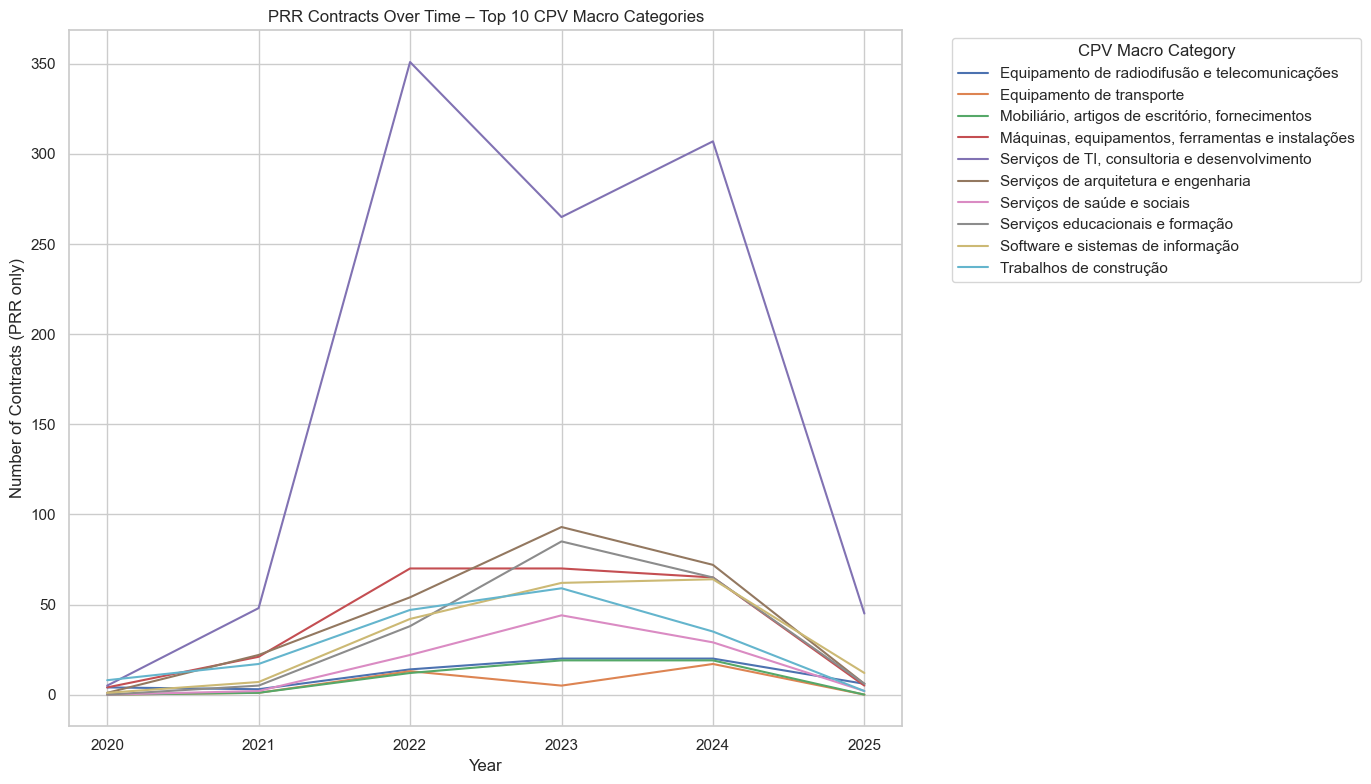

In [53]:
#Identify Top 10 CPV macro categories within PRR contracts
top_cpv_macro_prr = (
    df_merged[df_merged['is_prr'] == True]
    .groupby('cpv_macro_desc')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

#Filter PRR contracts with those top CPVs
df_top_cpv_prr = df_merged[
    (df_merged['cpv_macro_desc'].isin(top_cpv_macro_prr)) &
    (df_merged['is_prr'] == True)
].copy()

#Count number of PRR contracts per year and CPV macro
cpv_yearly_trend_prr = df_top_cpv_prr.groupby(['contract_year', 'cpv_macro_desc']) \
    .size().reset_index(name='num_contracts')

#Pivot for plotting
cpv_trend_pivot_prr = cpv_yearly_trend_prr.pivot(
    index='contract_year', columns='cpv_macro_desc', values='num_contracts'
).fillna(0)

#Plot
plt.figure(figsize=(14, 8))
for cpv in cpv_trend_pivot_prr.columns:
    plt.plot(cpv_trend_pivot_prr.index, cpv_trend_pivot_prr[cpv], label=cpv)

plt.title('PRR Contracts Over Time – Top 10 CPV Macro Categories')
plt.xlabel('Year')
plt.ylabel('Number of Contracts (PRR only)')
plt.legend(title='CPV Macro Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Analyzing by the CPV the areas with more contracts is clearly IT.
Next, we will confirm this by analyzing the 'cd_projeto', that is the code associated with every area regarding the PRR.

In [55]:
df_merged['cd_proj_prefix'] = (df_merged['cd_projeto'].astype(str).str[:3])

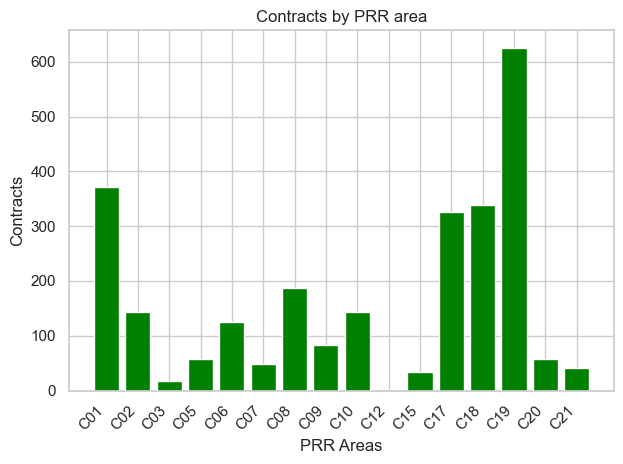

In [56]:
#Drop rows where cd_projeto is NaN, corresponding to contracts outside the prr scope
df_plot = df_merged[df_merged['cd_projeto'].notna()].copy()

# Extract the first 3 characters (prr area code) of cd_projeto
df_plot['cd_proj_prefix'] = df_plot['cd_projeto'].str[:3]

#Compute the frequency of each prefix
counts = df_plot['cd_proj_prefix'].value_counts().sort_index()

#Plot
plt.figure()
plt.bar(counts.index, counts.values, color='green')
plt.xlabel('PRR Areas')
plt.ylabel('Contracts')
plt.title('Contracts by PRR area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This barplot has the cumulative count of contracts since 2018 to 2025 regarding the PRR divided in categories. The areas with more contracts are:

C19 ('Administração Pública mais Eficiente)
C01 ('Serviço Nacional de Saúde')
C18 ('Justiça Económica e Amb. Negócios')
C17 ('Qualidade e Sustentabilidade Finanças Públicas')
C17, C18, C19 integrate the Digital Transformation area, and C01 the Resilience area.

### Have COVID and the Ukraine war changed public contracts in Portugal?

##### How the total contract value increased during these major events years?


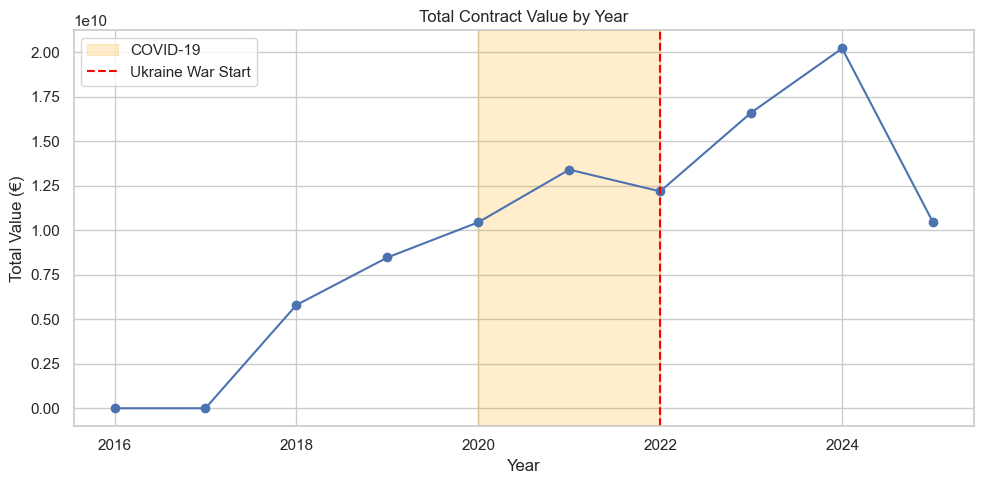

In [59]:
df_merged['publication_date'] = pd.to_datetime(df_merged['publication_date'], errors='coerce')
df_merged['year'] = df_merged['publication_date'].dt.year

annual_summary = df_merged.groupby('year').agg(
    num_contracts=('contract_type', 'count'),
    total_value=('contract_price_analysis', 'sum')
).reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(annual_summary['year'], annual_summary['total_value'], marker='o')
plt.axvspan(2020, 2022, color='orange', alpha=0.2, label='COVID-19')
plt.axvline(2022, color='red', linestyle='--', label='Ukraine War Start')
plt.title("Total Contract Value by Year")
plt.xlabel("Year")
plt.ylabel("Total Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
#Define threshold for low-value contracts (e.g., under €10,000)
low_value_threshold = 10000

#Ensure relevant columns are in the correct format
df_merged['contract_price_analysis'] = pd.to_numeric(df_merged['contract_price_analysis'], errors='coerce')
df_merged['year'] = pd.to_datetime(df_merged['publication_date']).dt.year

#Create a boolean flag indicating low-value contracts
df_merged['is_low_value'] = df_merged['contract_price_analysis'] < low_value_threshold

#Aggregate number of contracts and total value per year
contract_stats_by_year = df_merged.groupby('year').agg(
    num_contracts=('contract_price_analysis', 'count'),
    total_value=('contract_price_analysis', 'sum')
).reset_index()

#Calculate Year-over-Year (YoY) growth for number of contracts and total value
contract_stats_by_year['num_contracts_yoy'] = contract_stats_by_year['num_contracts'].pct_change() * 100
contract_stats_by_year['total_value_yoy'] = contract_stats_by_year['total_value'].pct_change() * 100

#Calculate the share of low-value vs high-value contracts per year (as %)
low_value_share = (
    df_merged.groupby('year')['is_low_value']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)
low_value_share.columns = ['high_value_share', 'low_value_share']  # False = high-value, True = low-value

#Merge the two summaries into a single final dataframe
summary = contract_stats_by_year.merge(low_value_share, on='year')

print(summary)

   year  num_contracts   total_value  num_contracts_yoy  total_value_yoy  \
0  2016              1  1.420298e+06                NaN              NaN   
1  2017             10  2.422104e+06         900.000000        70.534943   
2  2018          89856  5.798701e+09      898460.000000    239307.651103   
3  2019         128468  8.465928e+09          42.970976        45.996974   
4  2020         135166  1.044397e+10           5.213750        23.364734   
5  2021         161214  1.339808e+10          19.271118        28.285309   
6  2022         166360  1.217920e+10           3.192030        -9.097450   
7  2023         181400  1.659920e+10           9.040635        36.291430   
8  2024         220818  2.020539e+10          21.729879        21.725068   
9  2025          99086  1.043572e+10         -55.127752       -48.351785   

   high_value_share  low_value_share  
0        100.000000         0.000000  
1         70.000000        30.000000  
2         56.130921        43.869079  
3      

##### How the main cpv macro categories behave during these events?

In [62]:
#Group by total value per period per CPV Macro
cpv_event_summary = df_merged.groupby(['event_period', 'cpv_macro_desc'])['contract_price_analysis'].sum().reset_index()

#Number of years per period
years = {'pre_covid': 2, 'covid': 2, 'ukraine_war': 4}

#Average value per year
cpv_event_summary['avg_annual_value'] = cpv_event_summary.apply(
    lambda row: row['contract_price_analysis'] / years.get(row['event_period'], 1),
    axis=1
)

#Top 10 per period
top_pre = cpv_event_summary.query("event_period == 'pre_covid'").nlargest(10, 'avg_annual_value')
top_covid = cpv_event_summary.query("event_period == 'covid'").nlargest(10, 'avg_annual_value')
top_war = cpv_event_summary.query("event_period == 'ukraine_war'").nlargest(10, 'avg_annual_value')


print("Top 10 CPV Macro - Pre-COVID")
display(top_pre)

print("Top 10 CPV Macro - COVID")
display(top_covid)

print("Top 10 CPV Macro - Ukraine War")
display(top_war)


Top 10 CPV Macro - Pre-COVID


,event_period,cpv_macro_desc,contract_price_analysis,avg_annual_value
85,pre_covid,Trabalhos de construção,5.258608e+09,2.629304e+09
45,pre_covid,"Equipamento de imagiologia médica, precisão e ...",2.841911e+09,1.420956e+09
64,pre_covid,"Produtos petrolíferos, combustíveis, electrici...",1.131935e+09,5.659673e+08
70,pre_covid,"Serviços de esgotos, resíduos, limpeza e ambiente",8.687046e+08,4.343523e+08
78,pre_covid,Serviços educacionais e formação,8.157697e+08,4.078848e+08
74,pre_covid,Serviços de reparação e manutenção,6.990151e+08,3.495075e+08
68,pre_covid,"Serviços de TI, consultoria e desenvolvimento",6.410550e+08,3.205275e+08
69,pre_covid,Serviços de arquitetura e engenharia,5.096427e+08,2.548213e+08
48,pre_covid,Equipamento de transporte,4.917479e+08,2.458739e+08
71,pre_covid,Serviços de hotelaria e restauração,4.753017e+08,2.376508e+08


Top 10 CPV Macro - COVID


,event_period,cpv_macro_desc,contract_price_analysis,avg_annual_value
41,covid,Trabalhos de construção,7.309978e+09,3.654989e+09
1,covid,"Equipamento de imagiologia médica, precisão e ...",3.646116e+09,1.823058e+09
33,covid,Serviços de transporte,1.968319e+09,9.841596e+08
26,covid,"Serviços de esgotos, resíduos, limpeza e ambiente",9.402150e+08,4.701075e+08
20,covid,"Produtos petrolíferos, combustíveis, electrici...",8.409223e+08,4.204612e+08
34,covid,Serviços educacionais e formação,8.114733e+08,4.057367e+08
25,covid,Serviços de arquitetura e engenharia,7.058917e+08,3.529458e+08
24,covid,"Serviços de TI, consultoria e desenvolvimento",6.628295e+08,3.314147e+08
4,covid,Equipamento de transporte,6.596052e+08,3.298026e+08
27,covid,Serviços de hotelaria e restauração,5.673229e+08,2.836614e+08


Top 10 CPV Macro - Ukraine War


,event_period,cpv_macro_desc,contract_price_analysis,avg_annual_value
129,ukraine_war,Trabalhos de construção,1.772739e+10,4.431848e+09
89,ukraine_war,"Equipamento de imagiologia médica, precisão e ...",1.099017e+10,2.747543e+09
108,ukraine_war,"Produtos petrolíferos, combustíveis, electrici...",2.917941e+09,7.294853e+08
114,ukraine_war,"Serviços de esgotos, resíduos, limpeza e ambiente",2.773148e+09,6.932870e+08
112,ukraine_war,"Serviços de TI, consultoria e desenvolvimento",2.373011e+09,5.932528e+08
122,ukraine_war,Serviços educacionais e formação,2.176545e+09,5.441364e+08
92,ukraine_war,Equipamento de transporte,1.975924e+09,4.939809e+08
118,ukraine_war,Serviços de reparação e manutenção,1.908224e+09,4.770559e+08
113,ukraine_war,Serviços de arquitetura e engenharia,1.541975e+09,3.854938e+08
121,ukraine_war,Serviços de transporte,1.448925e+09,3.622312e+08


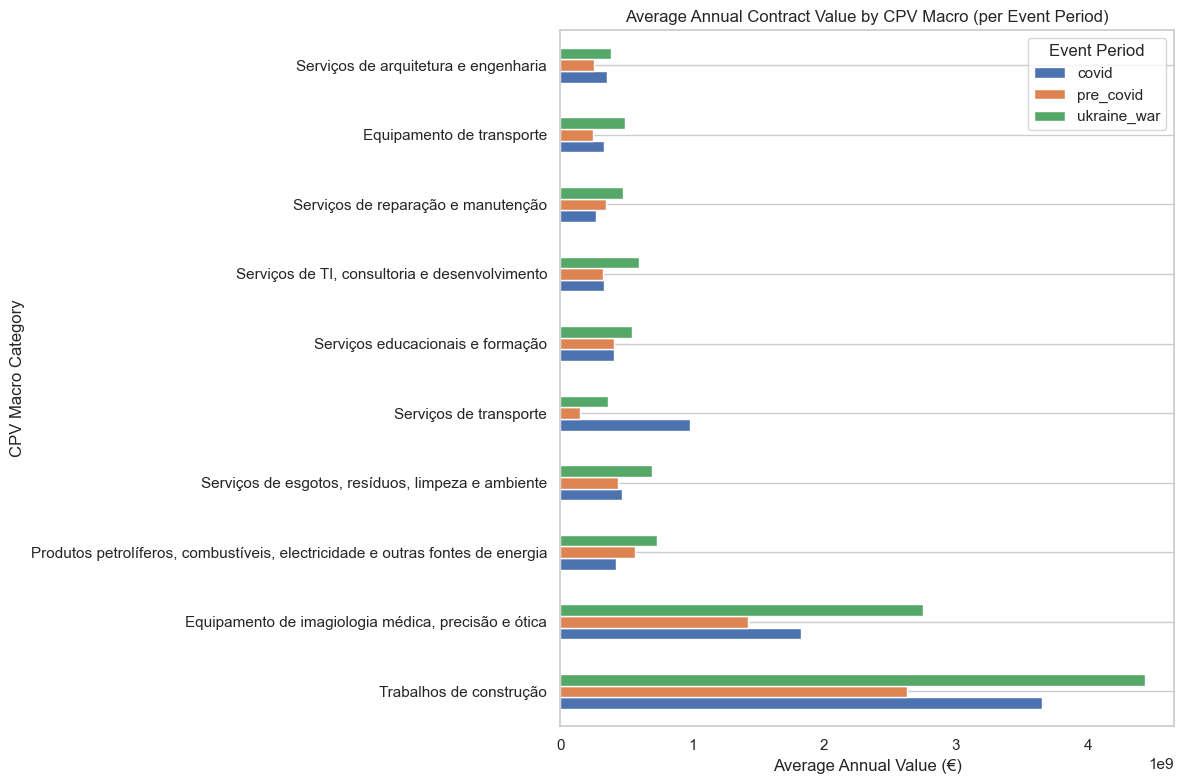

In [63]:
# Pivot for plotting
cpv_pivot = cpv_event_summary.pivot(
    index='cpv_macro_desc', columns='event_period', values='avg_annual_value'
).fillna(0)

#Select only the top 10 CPVs average
top_cpv = cpv_event_summary.groupby('cpv_macro_desc')['avg_annual_value'].sum().nlargest(10).index
cpv_top_plot = cpv_pivot.loc[top_cpv]

# Plot
import matplotlib.pyplot as plt
cpv_top_plot.plot(kind='barh', figsize=(12, 8))
plt.title('Average Annual Contract Value by CPV Macro (per Event Period)')
plt.xlabel('Average Annual Value (€)')
plt.ylabel('CPV Macro Category')
plt.legend(title='Event Period')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

#### Is the post COVID period is impacted by PRR?

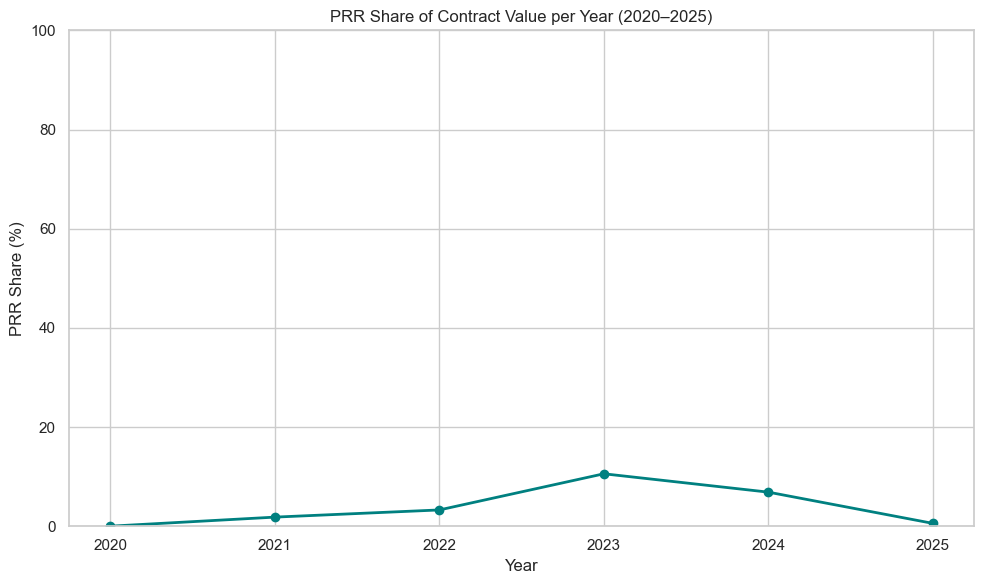

In [65]:
#Extract year
if 'year' not in df_merged.columns:
    df_merged['year'] = df_merged['publication_date'].dt.year

#Group by year and PRR
prr_share_by_year = df_merged.groupby(['year', 'is_prr']).agg(
    total_value=('contract_price_analysis', 'sum')
).reset_index()

#Pivot
pivot = prr_share_by_year.pivot(index='year', columns='is_prr', values='total_value').fillna(0)
pivot.columns = ['non_prr', 'prr'] if True in pivot.columns else ['non_prr']
pivot['total'] = pivot.sum(axis=1)
pivot['prr_share_percent'] = (pivot.get('prr', 0) / pivot['total']) * 100

#Filter by year (2020–2025)
plot_data = pivot.loc[2020:2025].reset_index()

#Plot
plt.figure(figsize=(10, 6))
plt.plot(plot_data['year'], plot_data['prr_share_percent'], marker='o', linewidth=2, color='teal')
plt.title('PRR Share of Contract Value per Year (2020–2025)')
plt.xlabel('Year')
plt.ylabel('PRR Share (%)')
plt.grid(True)
plt.xticks(plot_data['year'])
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [66]:
#Group by year and PRR
prr_share_by_year = df_merged.groupby(['year', 'is_prr']).agg(
    total_value=('contract_price_analysis', 'sum')
).reset_index()

#Pivot between PRR and not PRR
pivot = prr_share_by_year.pivot(index='year', columns='is_prr', values='total_value').fillna(0)
pivot.columns = ['non_prr', 'prr'] if True in pivot.columns else ['non_prr']
pivot['total'] = pivot.sum(axis=1)
pivot['prr_share_percent'] = (pivot.get('prr', 0) / pivot['total']) * 100

#Filtering years
prr_table = pivot.loc[2020:2025].reset_index()

#Display table
pd.set_option('display.float_format', '{:,.2f}'.format)
display(prr_table)

,year,non_prr,prr,total,prr_share_percent
0,2020,"10,442,361,269.89","1,608,674.43","10,443,969,944.32",0.02
1,2021,"13,151,319,204.88","246,759,888.70","13,398,079,093.58",1.84
2,2022,"11,778,468,828.17","400,726,710.98","12,179,195,539.15",3.29
3,2023,"14,842,790,110.07","1,756,409,665.17","16,599,199,775.24",10.58
4,2024,"18,815,789,368.82","1,389,597,871.29","20,205,387,240.11",6.88
5,2025,"10,375,176,322.03","60,545,539.79","10,435,721,861.82",0.58


#### Main conclusions for COVID and Ukraine War.

1. **Continuous growth in construction**: There was a consistent increase in investment over the three periods:

- Pre-COVID: €2.6B per year
- COVID: €3.6B per year
- Ukraine War: €4.4B per year
- This trend suggests that infrastructure was used as a lever for economic recovery — a common pattern in counter-cyclical public policy.


2. **Surge in Health Sector investment**: The CPV category Medical imaging, precision, and radiotherapy equipment more than doubled:

- From €1.4B → €1.8B → €2.7B per year
- This reflects pandemic response efforts and structural reinforcement of the national healthcare system.


3. **New category emerged during the pandemic: Transport Services**
- This category was negligible pre-COVID but rose to the third position during the pandemic with €984M per year.
- It then declined to €362M per year during the Ukraine war.
- Possible explanation: Emergency contracts for vaccine - distribution, medical logistics, or safe mobility initiatives.

4. **Structurally stable sectors**
- Educational and training services and Sewage, waste, and environmental services consistently appear in the top 10 across all periods.
- This suggests long-term strategic priorities maintained even during crises.

5. **Categories that declined or disappeared**
- Hospitality and catering services and Repair and maintenance services were strong before COVID but became unstable or declined in later periods.
- This may indicate contract cancellations or postponement of non-essential maintenance.

6. **Impact of PRR in Ukraine War period**
- Almost 10% of the contract value in 2023 and 7% in 2024 is related to PRR, which shows that it is impacting the analysis for Ukraine War period.